## 한글 형태소 분석 ,시각화, 워드 클라우드 등. 
### 형태소 분석, 품사 태깅. 
### 데이터 : 샘플 데이터 , 페이스북 전자 신문에서 크롤링 한 임시 데이터로  대체 
### 설치 가 조금 복잡함.
### 1) jdk 17 이상 2) JPype(자바, 파이썬 연결하는 도구) 3) konlpy 패키지 설치. 

## 주의사항, JPype 버전 1.4,  파이썬 버전 3.10.7 다운그레이드 
## 시스템 환경 변수 , ex) JAVA_HOME : 경로 추가 하기. jdk 17
### 변수명 : JAVA_HOME (동일하게)
### 시스템 환경 변수의 경로 값 예제: C:\Program Files\Java\jdk-17
### 변수명 : Path
### 경로 : C:\Program Files\Java\jdk-17\bin

## 파이썬 3.10.x , 예) 3.10.7 버전으로 다운 받기. 
### 시스템 환경 변수 추가 작업

### 변수명 : Path
### 경로C:\Python\Python39\

### 변수명 : Path
### 경로C:\Python\Python39\Scripts

### cmd -> python -V

## 2) JPype(자바, 파이썬 연결하는 도구)
### 다운로드 사이트 주소 : https://github.com/jpype-project/jpype/releases
### JPype 검색하고, 버전은 JPype1‑1.4.0‑cp310‑cp310‑win_amd64.whl 받아서, 
### 해당 다운로드 받은 폴더 이동하고, 해당 폴더 검색경로에서, cmd 실행하고, 
### cmd -> pip install JPype1‑1.4.0‑cp310‑cp310‑win_amd64.whl
### 업그레이드 경고창 뜨면 : 
### python.exe -m pip install --upgrade pip
### 업그레이드 후 , 다시 설치 
### pip install JPype1‑1.4.0‑cp310‑cp310‑win_amd64.whl
### , 명령어 붙여넣기. 
### pip install konlpy 

### 코드 실행시, 설치한(다운그레이드한 버전, 3.10.7) 선택, 
### 해당 쥬피터 노트북 관련 커널 설치도 자동으로 함. 




# 용어 정리 
## 형태소 , 형태소 분석
### 형태소: 언어에서 의미가 가장 작은 단위. 
### 형태소 분석: 형태소, 어근, 접두사/접미사, 품사 등 다양한 속성 구조. 
### 품사 태깅 예) 상용 이가 좋아 하는 음식 은 국밥 이다. 
### 음식 : NNG, 이가/JKM , 좋아하는/VV, 이다/EFN , 높임말 : 하신다 -> 신/EPH
### 품사 태깅 해주는 패키지 : Hananum, Kkma, Komoran, Okt(Twitter 제공)
### Okt , 명사 /Noun , 에/ Josa, 먹는/ Verb , 다/Eomi 

# 샘플 데이터 사용. 
# 

In [74]:
# 최초 실행 때는, 설치 후에 주석하기. 
# !pip install matplotlib
# !pip install wordcloud

In [75]:
import json
import re 
# Okt , 한글 품사 태깅하기위한 모듈, 도구.
from konlpy.tag import Okt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt 
from matplotlib import font_manager
from wordcloud import WordCloud 



In [92]:
# 샘플 데이터 읽어서, 메모리에서 확인해보기. 
# inputFileName = "./etnews.kr_facebook_2016-01-01_2018-08-01_4차 산업혁명.json"
inputFileName = "./file/취업_naver_news.json"
data = json.loads(open(inputFileName,"r",encoding = "utf-8").read())
data

[{'cnt': 1,
  'description': '경기도에서 한식당을 운영하는 외식업주의 자녀 최 모 양은 &quot;우아한 사장님 자녀 장학금 덕분에 무리한 아르바이트 없이 <b>취업</b> 준비에 전념할 수 있었고 원하는 결과를 이룰 수 있었다&quot;며 소감을 전했다. 기존에는... ',
  'link': 'https://www.ziksir.com/news/articleView.html?idxno=83406',
  'org_link': 'https://www.ziksir.com/news/articleView.html?idxno=83406',
  'pDate': '2025-02-27 17:06:00',
  'title': '배달의민족, 외식업주 자녀에 최대 400만원 장학금 지원'},
 {'cnt': 2,
  'description': '경기도에서 한식당을 운영하는 외식업주의 자녀 최 모 양은 &quot;우아한 사장님 자녀 장학금 덕분에 무리한 아르바이트 없이 <b>취업</b> 준비에 전념할 수 있었고 원하는 결과를 이룰 수 있었다&quot;며 소감을 전했다. 기존에는... ',
  'link': 'http://www.sportsq.co.kr/news/articleView.html?idxno=477355',
  'org_link': 'http://www.sportsq.co.kr/news/articleView.html?idxno=477355',
  'pDate': '2025-02-27 17:06:00',
  'title': '배민, 외식업주 자녀 장학생 모집'},
 {'cnt': 3,
  'description': '노인 돌봄을 위한 외국인 간호조무사들의 국내 <b>취업</b> 허용 등도 제안했다. 이 회장은 현재 라오스와 캄보디아 등 동남아에 간호대학을 설립해 노인요양, 간호, 호스피스 등을 위한 간호조무사를 양성하고 있다. 이... ',
  'link': 'http://sjbnews.com/news/news.php?number=842570',
  '

In [77]:
# 해당 데이터에서, 기사 내용인 , message 부분의 값 추출 작업. 
# 임시 저장 문자열
message = ""
# data = [{딕션너리1},{딕션너리2},{딕션너리3},...]
for item in data:
  # if "message" in item.keys():
  if "description" in item.keys():
    # (\w : 문자, 숫자 의미 ) 앞에 ^(not) 가 아닌 것은 모두 -> 공백으로 변경함.
    # 하나의 임시 메세지 문자열 변수에 담기
    message = message + re.sub(r"[^\w]"," ", item["description"]) + ""
    # message = message + re.sub(r"[^\w]"," ", item["message"]) + ""
message

'경기도에서 한식당을 운영하는 외식업주의 자녀 최 모 양은  quot 우아한 사장님 자녀 장학금 덕분에 무리한 아르바이트 없이  b 취업  b  준비에 전념할 수 있었고 원하는 결과를 이룰 수 있었다 quot 며 소감을 전했다  기존에는    경기도에서 한식당을 운영하는 외식업주의 자녀 최 모 양은  quot 우아한 사장님 자녀 장학금 덕분에 무리한 아르바이트 없이  b 취업  b  준비에 전념할 수 있었고 원하는 결과를 이룰 수 있었다 quot 며 소감을 전했다  기존에는    노인 돌봄을 위한 외국인 간호조무사들의 국내  b 취업  b  허용 등도 제안했다  이 회장은 현재 라오스와 캄보디아 등 동남아에 간호대학을 설립해 노인요양  간호  호스피스 등을 위한 간호조무사를 양성하고 있다  이    경남 김해 지역의 청년 고용률 향상에 이바지하는 한편  젊은 세대의  b 취업  b  안정과 경제 활동에 기여할 것으로 예상된다  지역 소상공인 제품 매입 확대를 통한 지역 경제 활성화 효과도 기대된다  쿠팡은 지역 소상공인    또 외국인 유학생만을 위한  b 취업  b 박람회도 개최하고 유학생의 안정적 생활과 지역사회와의 유대감 강화 및 정착을 돕는 유학생 후견인 시스템인  K 가디언 제도 를 운영하고 있다  유학생이 아닌 결혼이민자들을 위한    이같은 선발계획은 기존 몽골  베트남 등에서 유입된 이주배경 학생들에게 보다 체계적인 직업교육의 기회를 제공하며  안정적인 교육과  b 취업  b 을 통해 미래를 설계할 수 있도록 지원한다는 뜻을 담고 있다  특히  이주배경    또한  국민은행은 교육생들에게  자기주도학습비 지원  1대1  b 취업  b  컨설팅 및 특강  현직자와 함께하는 금융 프로젝트 및  b 취업  b  멘토링  코딩테스트 대비반 운영  국내 연수 및 힐링캠프   b 취업  b 준비패키지    전문인력양성사업  b 취업  b 연계형 특성화과정  에 2년 연속 선정되는 쾌거를 이뤘다  이 사업은    이 사업을 통해 대학원생들에게 장학금 혜택과 

In [85]:
# 품사 태깅, Okt 패키지 사용하기. 
nlp = Okt()
message_N = nlp.nouns(message)
message_N


['경기도',
 '한식당',
 '운영',
 '외식',
 '업주',
 '자녀',
 '최',
 '모',
 '양은',
 '사장',
 '자녀',
 '장학금',
 '덕분',
 '아르바이트',
 '취업',
 '준비',
 '전념',
 '수',
 '결과',
 '수',
 '며',
 '소감',
 '전',
 '기존',
 '경기도',
 '한식당',
 '운영',
 '외식',
 '업주',
 '자녀',
 '최',
 '모',
 '양은',
 '사장',
 '자녀',
 '장학금',
 '덕분',
 '아르바이트',
 '취업',
 '준비',
 '전념',
 '수',
 '결과',
 '수',
 '며',
 '소감',
 '전',
 '기존',
 '노인',
 '위',
 '외국인',
 '간호조무사',
 '국내',
 '취업',
 '허용',
 '등',
 '제안',
 '이',
 '회장',
 '현재',
 '라오스',
 '캄보디아',
 '등',
 '동남아',
 '간호',
 '대학',
 '설립',
 '노인',
 '요양',
 '간호',
 '호스피스',
 '등',
 '위',
 '간호조무사',
 '양성',
 '이',
 '경남',
 '김해',
 '지역',
 '청년',
 '고용',
 '률',
 '향상',
 '이바지',
 '한편',
 '세대',
 '취업',
 '안정',
 '경제',
 '활동',
 '기여',
 '것',
 '예상',
 '지역',
 '소상',
 '공인',
 '제품',
 '매입',
 '확대',
 '통한',
 '지역',
 '경제',
 '활성화',
 '효과',
 '기대',
 '쿠팡',
 '지역',
 '소상',
 '공인',
 '또',
 '외국인',
 '유학생',
 '위',
 '취업',
 '박람회',
 '개최',
 '유학생',
 '안정',
 '생활',
 '지역',
 '사회',
 '유',
 '대감',
 '강화',
 '및',
 '정착',
 '유학생',
 '후견인',
 '시스템',
 '가디언',
 '제도',
 '를',
 '운영',
 '유학생',
 '결혼',
 '이민자',
 '위',
 '이',
 '선발',
 '계획',
 '기존',
 '몽골

In [86]:
# 집계 데이터 기본 탐색, 모델 구축 하기. 
count = Counter(message_N)
count

Counter({'취업': 1653,
         '청년': 521,
         '등': 425,
         '지원': 374,
         '지역': 343,
         '수': 232,
         '이': 230,
         '준비': 225,
         '사업': 221,
         '것': 202,
         '교육': 194,
         '위': 178,
         '및': 177,
         '명': 168,
         '위해': 161,
         '경제': 155,
         '일자리': 155,
         '제공': 153,
         '맞춤': 148,
         '프로그램': 144,
         '기업': 142,
         '센터': 136,
         '운영': 131,
         '대학': 127,
         '생': 121,
         '고용': 117,
         '률': 112,
         '통해': 112,
         '한국': 111,
         '활동': 108,
         '기관': 108,
         '역량': 107,
         '세': 102,
         '이번': 102,
         '금융': 99,
         '분야': 99,
         '확대': 97,
         '향상': 92,
         '관련': 91,
         '대상': 91,
         '창업': 91,
         '공인': 87,
         '학생': 87,
         '소상': 86,
         '고': 86,
         '이상': 83,
         '개': 81,
         '근로자': 80,
         '자': 80,
         '계': 78,
         '구직': 74,
      

In [87]:
# 임시 딕션너리에 담아서, 필요한 부분 추출해서 조사. 
word_count = dict()

# 상위 80개 정도 
for tag, counts in count.most_common(80):
  if len(str(tag))>1:
    word_count[tag] = counts
    # print(f" tag : {tag}, counts : {counts}")
word_count

{'취업': 1653,
 '청년': 521,
 '지원': 374,
 '지역': 343,
 '준비': 225,
 '사업': 221,
 '교육': 194,
 '위해': 161,
 '경제': 155,
 '일자리': 155,
 '제공': 153,
 '맞춤': 148,
 '프로그램': 144,
 '기업': 142,
 '센터': 136,
 '운영': 131,
 '대학': 127,
 '고용': 117,
 '통해': 112,
 '한국': 111,
 '활동': 108,
 '기관': 108,
 '역량': 107,
 '이번': 102,
 '금융': 99,
 '분야': 99,
 '확대': 97,
 '향상': 92,
 '관련': 91,
 '대상': 91,
 '창업': 91,
 '공인': 87,
 '학생': 87,
 '소상': 86,
 '이상': 83,
 '근로자': 80,
 '구직': 74,
 '노인': 71,
 '사회': 71,
 '채용': 70,
 '안정': 69,
 '진로': 69,
 '외국인': 68,
 '경남': 68,
 '상담': 68,
 '올해': 67,
 '산업': 66,
 '자녀': 63,
 '추진': 63,
 '장애인': 62,
 '한편': 61,
 '시설': 61,
 '활성화': 60,
 '목표': 60,
 '주택': 60,
 '효과': 59,
 '주거': 59,
 '김해': 58,
 '기여': 58,
 '신규': 57}

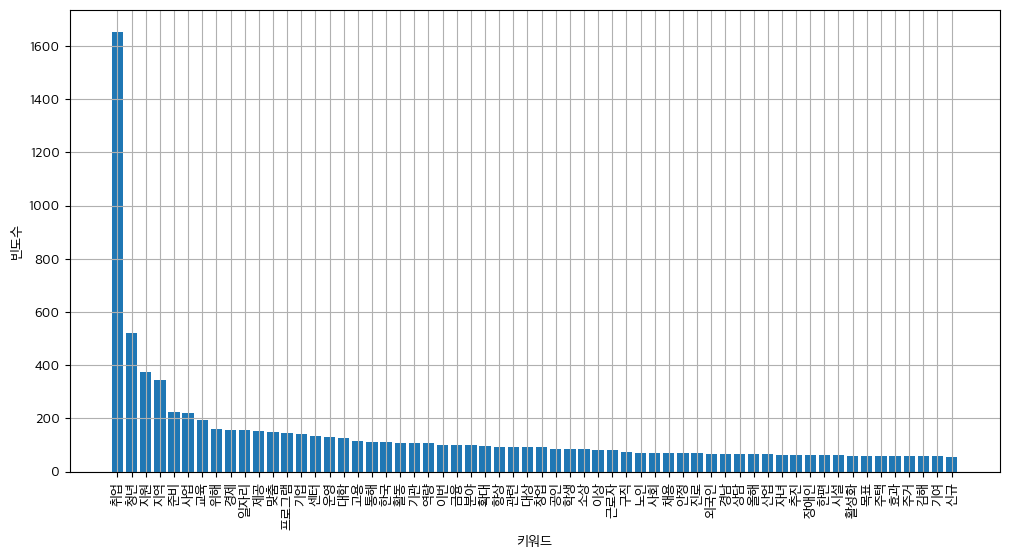

In [88]:
# 시각화1, 막대 그래프 
# 폰트 임포트 , 메모리에 설정 
font_path = "/System/Library/Fonts/AppleSDGothicNeo.ttc"
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc("font", family = font_name)

#, x축, y축, 가로x세로 비율, x 라벨, 폰트 설정 등
plt.figure(figsize=(12,6))
plt.xlabel("키워드")
plt.ylabel("빈도수")
plt.grid(True)

# 딕션너리의 키, 값 , 정렬 내림차순 
sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(),reverse=True)

# 막대 그래프 그리기. 
plt.bar(range(len(word_count)), sorted_Values, align="center")

# x 축 라벨 설정. 
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = "vertical")

plt.show()

In [82]:
# !pip install Numpy

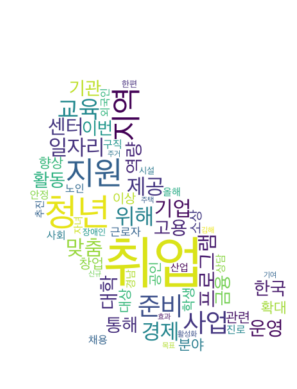

In [89]:
# 시각화2, 워드 클라우드 
import numpy as np

from PIL import Image

alice_mask = np.array(Image.open("file/haru-sh.png"))

# 실행시, 한글이 깨져서, 해당 폰트 패스 경로 지정 필요.
wc = WordCloud(font_path, background_color="white", max_words=1000, mask=alice_mask,width=800,height=1000)
# generate word cloud
sampleImage = wc.generate_from_frequencies(word_count)

# show
plt.imshow(sampleImage, interpolation="bilinear")
# plt.imshow(sampleImage)

plt.axis("off")
plt.show()

In [93]:
# 해당 출력을 이미지로 저장 하기. 
sampleImage.to_file(inputFileName + "_cloud.jpg")